In [334]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [335]:
dataset = pd.read_csv("Holteiu_N_Daniel_Ninel_train.csv")

In [336]:
print(dataset)

              Breed Name   Weight(g)  Height(cm)  Longevity(yrs) Energy level  \
0                Amstaff  27412.4472     46.4779         12.7271          med   
1                Amstaff  33302.6172         NaN         12.9844          low   
2       Airedale Terrier  19184.9322     57.7801         10.1529         high   
3                Amstaff  26228.6536     45.6682         13.5366          low   
4              Daschhund   7720.7755     20.1153         13.8247         high   
5       Airedale Terrier  20379.5337     57.5140         10.2833         high   
6       Airedale Terrier  21246.1613         NaN         11.4508         high   
7       Airedale Terrier  21491.1460     56.7838         12.8966         high   
8       Airedale Terrier  21740.7510         NaN         11.4410         high   
9    Jack Russel Terrier   6820.8519     33.5175         13.6113         high   
10               Amstaff  23545.6745         NaN         13.1212          med   
11             Daschhund  14

In [337]:
# Task 1

In [338]:
# Getting the list of all "Breed Names" and encoding them so to not use Strings
breed_list = set(dataset['Breed Name'].tolist())
breed_encoding = {}
for breed_name, index in zip(breed_list, range(len(breed_list))):
    breed_encoding[breed_name] = index
modified_dataset = dataset
modified_dataset['Breed Name'] = modified_dataset['Breed Name'].map(lambda el: breed_encoding.get(el))
# getting rid of Longevity column
modified_dataset = modified_dataset.drop('Longevity(yrs)', axis=1)
# Also getting rid of Owner Name (makes no sense for us) - Results don't depend on Owner Name
modified_dataset = modified_dataset.drop('Owner Name', axis=1)
print(modified_dataset)

     Breed Name   Weight(g)  Height(cm) Energy level Attention Needs  \
0             1  27412.4472     46.4779          med            high   
1             1  33302.6172         NaN          low             med   
2             2  19184.9322     57.7801         high            high   
3             1  26228.6536     45.6682          low             med   
4             0   7720.7755     20.1153         high             med   
5             2  20379.5337     57.5140         high            high   
6             2  21246.1613         NaN         high            high   
7             2  21491.1460     56.7838         high            high   
8             2  21740.7510         NaN         high            high   
9             3   6820.8519     33.5175         high             med   
10            1  23545.6745         NaN          med            high   
11            0  14489.3409     20.8370         high             med   
12            1  27870.3226     46.1721          med            

In [339]:
# Handling Missing Data
print(modified_dataset.isnull().sum())
modified_dataset = modified_dataset.dropna() # drop missing data
modified_dataset = modified_dataset.reset_index(drop=True)

Breed Name           0
Weight(g)            0
Height(cm)         196
Energy level         0
Attention Needs      0
Coat Lenght          0
Sex                  0
dtype: int64


In [340]:
# Handling Categorical Data
# The Categorical Data is handled using One Hot Encoder.
categorical_columns = ["Energy level", "Attention Needs", "Coat Lenght", "Sex"]
for column in categorical_columns:
    label_encoder = LabelEncoder()
    ohe_encoder = OneHotEncoder()
    unique_columns = set(dataset[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    modified_dataset[column + "_encoded"] = label_encoder.fit_transform(modified_dataset[column])
    aux = ohe_encoder.fit_transform(modified_dataset[column + "_encoded"].values.reshape(-1, 1)).toarray()
    aux = pd.DataFrame(aux, columns=[column + "_" + unique_columns.get(i) for i in range(aux.shape[1])])
    modified_dataset = pd.concat([modified_dataset, aux], axis=1)
    modified_dataset = modified_dataset.drop(column, axis=1)
    modified_dataset = modified_dataset.drop(column + "_encoded", axis=1)

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique 

In [341]:
# Normalization (Just for Weight(g) and Height(cm)). I am using Min Max Normalizer
# (X - min(X)) / (max(X) - min(X))
modified_dataset["Weight(g)"] = (modified_dataset["Weight(g)"] - modified_dataset["Weight(g)"].min()) / (modified_dataset["Weight(g)"].max() - modified_dataset["Weight(g)"].min())
modified_dataset["Height(cm)"] = (modified_dataset["Height(cm)"] - modified_dataset["Height(cm)"].min()) / (modified_dataset["Height(cm)"].max() - modified_dataset["Height(cm)"].min())

In [342]:
print(modified_dataset)

     Breed Name  Weight(g)  Height(cm)  Energy level_low  Energy level_med  \
0             1   0.759598    0.684992               0.0               0.0   
1             2   0.529946    0.971062               1.0               0.0   
2             1   0.726555    0.664498               0.0               1.0   
3             0   0.209950    0.017728               1.0               0.0   
4             2   0.563290    0.964327               1.0               0.0   
5             2   0.594318    0.945845               1.0               0.0   
6             3   0.184831    0.356951               1.0               0.0   
7             0   0.398879    0.035995               1.0               0.0   
8             1   0.772379    0.677252               0.0               0.0   
9             2   0.503069    0.949383               1.0               0.0   
10            0   0.403066    0.028918               1.0               0.0   
11            3   0.158901    0.362266               1.0        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110110278>,
      dtype=object)

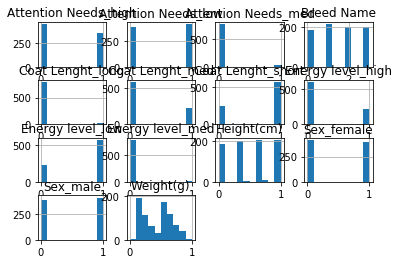

In [343]:
# Vizualizarea Datelor
modified_dataset.hist()

In [344]:
y = modified_dataset["Breed Name"]
test = modified_dataset.drop('Breed Name', axis=1)
x_train, x_test, y_train, y_test = train_test_split(test, y)

In [345]:
def plot_decision_boundary(model, X, y):
  """
    Use this to plot the decision boundary of a trained model.
  """
  
  xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
  grid = np.c_[xx.ravel(), yy.ravel()]
  probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                        vmin=0, vmax=1)
  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = 1)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])

  ax.scatter(X[:,0], X[:, 1], c=y, s=50,
             cmap="RdBu", vmin=-.2, vmax=1.2,
             edgecolor="white", linewidth=1)

  ax.set(aspect="equal",
         xlim=(-5, 5), ylim=(-5, 5),
         xlabel="$X_1$", ylabel="$X_2$")

In [346]:
# testing Logistic Regression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
accuracy = accuracy_score(model.predict(x_test), y_test)
print(LogisticRegression.__name__, accuracy)
  

LogisticRegression 0.9850746268656716


/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [347]:
# testing Random Forests
model = RandomForestClassifier()
model.fit(x_train, y_train)
accuracy = accuracy_score(model.predict(x_test), y_test)
print(RandomForestClassifier.__name__, accuracy)

RandomForestClassifier 1.0


/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [348]:
# testing KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train, y_train)
accuracy = accuracy_score(model.predict(x_test), y_test)
print(KNeighborsClassifier.__name__, accuracy)

KNeighborsClassifier 0.9900497512437811


In [349]:
# Task 2

In [350]:
dataset = pd.read_csv("Holteiu_N_Daniel_Ninel_train.csv")

In [351]:
# get rid of Breed Name
modified_dataset = dataset
modified_dataset = modified_dataset.drop('Breed Name', axis=1)
modified_dataset = modified_dataset.drop('Owner Name', axis=1)
print(modified_dataset)

      Weight(g)  Height(cm)  Longevity(yrs) Energy level Attention Needs  \
0    27412.4472     46.4779         12.7271          med            high   
1    33302.6172         NaN         12.9844          low             med   
2    19184.9322     57.7801         10.1529         high            high   
3    26228.6536     45.6682         13.5366          low             med   
4     7720.7755     20.1153         13.8247         high             med   
5    20379.5337     57.5140         10.2833         high            high   
6    21246.1613         NaN         11.4508         high            high   
7    21491.1460     56.7838         12.8966         high            high   
8    21740.7510         NaN         11.4410         high            high   
9     6820.8519     33.5175         13.6113         high             med   
10   23545.6745         NaN         13.1212          med            high   
11   14489.3409     20.8370         13.5397         high             med   
12   27870.3

In [352]:
# Handling Missing Data
print(modified_dataset.isnull().sum())
modified_dataset = modified_dataset.dropna() # drop missing data
modified_dataset = modified_dataset.reset_index(drop=True)

Weight(g)            0
Height(cm)         196
Longevity(yrs)       0
Energy level         0
Attention Needs      0
Coat Lenght          0
Sex                  0
dtype: int64


In [353]:
# Handling Categorical Data
# The Categorical Data is handled using One Hot Encoder.
categorical_columns = ["Energy level", "Attention Needs", "Coat Lenght", "Sex"]
for column in categorical_columns:
    label_encoder = LabelEncoder()
    ohe_encoder = OneHotEncoder()
    unique_columns = set(dataset[column].tolist())
    unique_columns = {key: value for key, value in zip(range(len(unique_columns)), unique_columns)}
    modified_dataset[column + "_encoded"] = label_encoder.fit_transform(modified_dataset[column])
    aux = ohe_encoder.fit_transform(modified_dataset[column + "_encoded"].values.reshape(-1, 1)).toarray()
    aux = pd.DataFrame(aux, columns=[column + "_" + unique_columns.get(i) for i in range(aux.shape[1])])
    modified_dataset = pd.concat([modified_dataset, aux], axis=1)
    modified_dataset = modified_dataset.drop(column, axis=1)
    modified_dataset = modified_dataset.drop(column + "_encoded", axis=1)

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique 

In [354]:
# Normalization (Just for Weight(g) and Height(cm)). I am using Min Max Normalizer
# (X - min(X)) / (max(X) - min(X))
modified_dataset["Weight(g)"] = (modified_dataset["Weight(g)"] - modified_dataset["Weight(g)"].min()) / (modified_dataset["Weight(g)"].max() - modified_dataset["Weight(g)"].min())
modified_dataset["Height(cm)"] = (modified_dataset["Height(cm)"] - modified_dataset["Height(cm)"].min()) / (modified_dataset["Height(cm)"].max() - modified_dataset["Height(cm)"].min())

In [355]:
modified_dataset

,Weight(g),Height(cm),Longevity(yrs),Energy level_low,Energy level_med,Energy level_high,Attention Needs_low,Attention Needs_med,Attention Needs_high,Coat Lenght_long,Coat Lenght_med,Coat Lenght_short,Sex_male,Sex_female
0,0.759598,0.684992,12.7271,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.529946,0.971062,10.1529,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.726555,0.664498,13.5366,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.209950,0.017728,13.8247,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.563290,0.964327,10.2833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,0.594318,0.945845,12.8966,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.184831,0.356951,13.6113,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,0.398879,0.035995,13.5397,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,0.772379,0.677252,13.0982,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,0.503069,0.949383,10.2664,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [356]:
y = modified_dataset["Longevity(yrs)"]
test = modified_dataset.drop('Longevity(yrs)', axis=1)
x_train, x_test, y_train, y_test = train_test_split(test, y)

In [357]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [358]:
y_test = y_test.values

In [359]:
for y1, y2 in zip(y_test, predictions):
    print("y_test = ", y1, " y_predicted = ", y2, " Difference = ", abs(y1 - y2))

y_test =  11.292  y_predicted =  11.75390625  Difference =  0.4619062500000002
y_test =  13.4986  y_predicted =  13.2890625  Difference =  0.2095374999999997
y_test =  12.7693  y_predicted =  12.87109375  Difference =  0.10179375000000057
y_test =  13.4918  y_predicted =  13.57421875  Difference =  0.08241875000000043
y_test =  11.4944  y_predicted =  11.859375  Difference =  0.3649749999999994
y_test =  12.6665  y_predicted =  13.59375  Difference =  0.9272500000000008
y_test =  10.9615  y_predicted =  11.5390625  Difference =  0.5775625000000009
y_test =  11.6686  y_predicted =  11.6796875  Difference =  0.011087500000000361
y_test =  14.1349  y_predicted =  13.5234375  Difference =  0.6114625
y_test =  11.6081  y_predicted =  11.65234375  Difference =  0.04424374999999969
y_test =  14.6025  y_predicted =  13.49609375  Difference =  1.1064062499999991
y_test =  12.8483  y_predicted =  13.078125  Difference =  0.22982499999999995
y_test =  13.6411  y_predicted =  12.7734375  Differenc